In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from sklearn import preprocessing

Downloading training and test images. 

In [5]:
!pip install aicrowd-cli

     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 174kB 39.5MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 215kB 50.0MB/s 
     |████████████████████████████████| 71kB 11.2MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [2]:
API_KEY = "fd1aed7204268f0bae2780fb808a4063" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [3]:
!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

train_images.zip: 100% 754M/754M [00:18<00:00, 40.0MB/s]
test_images.zip: 100% 33.9M/33.9M [00:01<00:00, 22.1MB/s]
train.csv: 100% 253k/253k [00:00<00:00, 1.11MB/s]
test.csv: 100% 7.27k/7.27k [00:00<00:00, 874kB/s]


In [4]:
!rm -rf data
!mkdir data

Mapping the class names to intergers. (Assuming 62 classes)

In [6]:
labels_map = ["BG",                                       
"water",                                             
"pizza-margherita-baked",                            
"broccoli",                                         
"salad-leaf-salad-green",                            
"zucchini" ,                                         
"egg",                                               
"butter",                                            
"bread-white" ,                                      
"apple" ,                                            
"dark-chocolate" ,                                   
"white-coffee-with-caffeine" ,                       
"sweet-pepper" ,                                     
"mixed-salad-chopped-without-sauce" ,                
"tomato-sauce" ,                                     
"bread-wholemeal",                                   
"coffee-with-caffeine" ,                             
"cucumber" ,                                         
"cheese",                                            
"pasta-spaghetti",                                   
"rice"  ,                                            
"salmon" ,                                           
"carrot" ,                                           
"onion"   ,                                          
"mixed-vegetables" ,                                 
"espresso-with-caffeine" ,                           
"banana"  ,                                          
"strawberries" ,                                     
"mayonnaise" ,                                       
"almonds"   ,                                        
"wine-white"  ,                                      
"hard-cheese"   ,                                    
"ham-raw" ,                                          
"tomato",                                            
"french-beans",                                      
"mandarine",                                         
"wine-red" ,                                         
"potatoes-steamed",                                 
"croissant"   ,                                      
"salami",                                            
"boisson-au-glucose-50g"  ,                          
"biscuits"   ,                                       
"corn"        ,                                      
"leaf-spinach"    ,                                  
"jam"    ,                                           
"tea-green" ,                                        
"chips-french-fries"   ,                             
"parmesan"   ,                                       
"beer"     ,                                         
"avocado"   ,                                        
"bread-french-white-flour" ,                         
"chicken"   ,                                        
"soft-cheese" ,                                      
"tea"   ,                                            
"sauce-savoury" ,                                    
"honey"         ,                                   
"bread-whole-wheat"  ,                               
"bread-sourdough"   ,                                
"gruyere",                                           
"pickle"      ,                                      
"mixed-nuts" ,                                       
"water-mineral"]

# label_map.type

labels_map = np.array(labels_map)
# print(labels_map)
# result = np.where(labels_map == "water-mineral")
# print(result)
# # labels = ['cat', 'dog', 'mouse', 'elephant', 'pandas']
# le = preprocessing.LabelEncoder()
# targets = le.fit_transform(labels_map)
#         # targets: array([0, 1, 2, 3])
# targets = torch.as_tensor(targets)
#         # targets: tensor([0, 1, 2, 3])
# print(targets.type)        

In [7]:
!unzip test_images.zip

Archive:  test_images.zip
   creating: test_images/
  inflating: test_images/bfa90c6ac0.jpg  
  inflating: test_images/097c66c0b2.jpg  
  inflating: test_images/a554d1ca8d.jpg  
  inflating: test_images/74a18d3e00.jpg  
  inflating: test_images/9da953d6bc.jpg  
  inflating: test_images/315702b43e.jpg  
  inflating: test_images/20118ce05c.jpg  
  inflating: test_images/b918453fab.jpg  
  inflating: test_images/ec6ab64433.jpg  
  inflating: test_images/4ce545b668.jpg  
  inflating: test_images/2f6f347487.jpg  
  inflating: test_images/59b2ddfc21.jpg  
  inflating: test_images/234a5c97f6.jpg  
  inflating: test_images/b9d0e34a4f.jpg  
  inflating: test_images/8dbf2ab0dd.jpg  
  inflating: test_images/d4c283a3df.jpg  
  inflating: test_images/1570309e87.jpg  
  inflating: test_images/d312dafa4d.jpg  
  inflating: test_images/1da36a3419.jpg  
  inflating: test_images/a0d8cc402a.jpg  
  inflating: test_images/2c7d1a3bec.jpg  
  inflating: test_images/2d201f1150.jpg  
  inflating: test_images

In [8]:
!unzip train_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/6c3093ed09.jpg  
  inflating: train_images/d457c6c055.jpg  
  inflating: train_images/29ef2e59a9.jpg  
  inflating: train_images/8a14ef0771.jpg  
  inflating: train_images/8704e89824.jpg  
  inflating: train_images/a713f70b0c.jpg  
  inflating: train_images/b212e3a08f.jpg  
  inflating: train_images/efbd9c3f78.jpg  
  inflating: train_images/1be94502d6.jpg  
  inflating: train_images/95e4dbc52b.jpg  
  inflating: train_images/741b7f61e2.jpg  
  inflating: train_images/0f4e1e287c.jpg  
  inflating: train_images/ed6f280bae.jpg  
  inflating: train_images/489302abdb.jpg  
  inflating: train_images/7c65dfa290.jpg  
  inflating: train_images/6a842c6b01.jpg  
  inflating: train_images/fe7210e4cd.jpg  
  inflating: train_images/c6d0450365.jpg  
  inflating: train_images/ba37f5f354.jpg  
  inflating: train_images/9b1632bc06.jpg  
  inflating: train_images/a2463d8e1c.jpg  
  inflating: train_images/5cfc38ecf4.jpg  
  i

Creating a dataset class for our food item dataset. We will read the csv in __init__ but leave the reading of images to __getitem__. This is memory efficient because all the images are not stored in the memory at once but read as required.

In [9]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, transform = transforms.Compose([
        transforms.Resize((224,224)) , transforms.RandomHorizontalFlip(p=0.5), transforms.RandomRotation(45)]), 
        target_transform=None):
        
        self.img_labels = pd.read_csv('./train.csv')
        self.img_dir = './train_images'
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        labels_map = ["BG",                                       
        "water",                                             
        "pizza-margherita-baked",                            
        "broccoli",                                         
        "salad-leaf-salad-green",                            
        "zucchini" ,                                         
        "egg",                                               
        "butter",                                            
        "bread-white" ,                                      
        "apple" ,                                            
        "dark-chocolate" ,                                   
        "white-coffee-with-caffeine" ,                       
        "sweet-pepper" ,                                     
        "mixed-salad-chopped-without-sauce" ,                
        "tomato-sauce" ,                                     
        "bread-wholemeal",                                   
        "coffee-with-caffeine" ,                             
        "cucumber" ,                                         
        "cheese",                                            
        "pasta-spaghetti",                                   
        "rice"  ,                                            
        "salmon" ,                                           
        "carrot" ,                                           
        "onion"   ,                                          
        "mixed-vegetables" ,                                 
        "espresso-with-caffeine" ,                           
        "banana"  ,                                          
        "strawberries" ,                                     
        "mayonnaise" ,                                       
        "almonds"   ,                                        
        "wine-white"  ,                                      
        "hard-cheese"   ,                                    
        "ham-raw" ,                                          
        "tomato",                                            
        "french-beans",                                      
        "mandarine",                                         
        "wine-red" ,                                         
        "potatoes-steamed",                                 
        "croissant"   ,                                      
        "salami",                                            
        "boisson-au-glucose-50g"  ,                          
        "biscuits"   ,                                       
        "corn"        ,                                      
        "leaf-spinach"    ,                                  
        "jam"    ,                                           
        "tea-green" ,                                        
        "chips-french-fries"   ,                             
        "parmesan"   ,                                       
        "beer"     ,                                         
        "avocado"   ,                                        
        "bread-french-white-flour" ,                         
        "chicken"   ,                                        
        "soft-cheese" ,                                      
        "tea"   ,                                            
        "sauce-savoury" ,                                    
        "honey"         ,                                   
        "bread-whole-wheat"  ,                               
        "bread-sourdough"   ,                                
        "gruyere",                                           
        "pickle"      ,                                      
        "mixed-nuts" ,                                       
        "water-mineral"]

        label = torch.tensor(labels_map.index(label))    
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [10]:
class CustomTestDataset(Dataset):
    def __init__(self, transform = transforms.Compose([
        transforms.Resize((224,224)) ]), 
        target_transform=None):
        
        self.img_labels = pd.read_csv('./test.csv')
        self.img_dir = './test_images'
        self.transform = transform
#         print(self.img_labels)
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)  
#         print(image)
        if self.transform:
            image = self.transform(image)
        return image

In [11]:
train_dataset = CustomImageDataset()
test_dataset = CustomTestDataset()


In [12]:
# npimg = feature.numpy()
# npimg_test = feature_test.numpy()

# plt.imshow(np.transpose(npimg, (1, 2, 0)))
# plt.show()

# plt.imshow(np.transpose(npimg_test, (1, 2, 0)))
# plt.show()

Implementing data loader and dividing the training set into training and validation set. Validation set consists of 0.2% images of the total number of images in training folder. 

In [13]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
batch_size = 32

# dataset = CustomDatasetFromCSV(my_path)
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(train_dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)



train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                                sampler=valid_sampler)


# train_dataloader = DataLoader(dataset=train_dataset , batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader = DataLoader(dataset=test_dataset , batch_size=batch_size, shuffle=True, num_workers=2)

In [14]:
# print(train_dataloader)

In [15]:
dataiter = iter(train_loader)
data = dataiter.next()
features, labels = data

# imshow(torchvision.utils.make_grid(features))

print(features.shape)
print(labels.type)

torch.Size([32, 3, 224, 224])
<built-in method type of Tensor object at 0x7f120f4a4eb0>


Different architectures for training this neural network. 

In [20]:
import torch.nn as nn
import torch.nn.functional as F


# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 61)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 61)
#         self.conv3 = nn.Conv2d(16, 24, 16)
#         self.fc1 = nn.Linear(24 * 30 * 30, 648)
#         self.fc2 = nn.Linear(648, 454)
#         self.fc3 = nn.Linear(454, 61)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = self.pool(F.relu(self.conv3(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 47 * 47, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 62)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 96, 11, stride=4)
        self.conv1_bn = nn.BatchNorm2d(96)

        self.pool = nn.MaxPool2d(3, stride=2)
        # self.pool = nn.AvgPool2d(3, stride=2)

        self.conv2 = nn.Conv2d(96, 256, 5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(256)

        self.conv3 = nn.Conv2d(256, 384, 3, stride=1, padding=1)
        # self.conv4 = nn.Conv2d(384, 384, 3, padding=1)

        self.conv5 = nn.Conv2d(384, 256, 3, stride=1, padding=1)
        self.conv5_bn = nn.BatchNorm2d(256)

        self.drop_layer = nn.Dropout(p = 0.5)

        self.fc1 = nn.Linear(6400, 4096)
        self.fc1_bn = nn.BatchNorm1d(4096)

        self.fc2 = nn.Linear(4096, 4096)
        self.fc2_bn = nn.BatchNorm1d(4096)

        self.fc3 = nn.Linear(4096, 62)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        # x = F.relu(self.conv4(x))
        x = self.pool(F.relu(self.conv5(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = F.relu(self.fc1(x))
        # x = self.drop_layer(x)
        # x = self.fc1_bn(x)
        
        x = F.relu(self.fc2(x))
        # x = self.drop_layer(x)

        # x = self.fc2_bn(x)
        x = self.fc3(x)
        return x           


net = Net()

Implemeting SGD Optimizer

In [21]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
loss_vals=  []
minibatch_vals = []
n = 0
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # print(i)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.float()
#         print(inputs)
#         print(inputs.type)
#         print(labels.type)
        
        # zero the parameter gradients -- because by default pytorch accumulates the gradients
        # You could possibly update after skipping a few iterations, after accumulating gradients
        # say your batch size is 2 but you need gradients for batch of 8
        # in that case you can call zero grad after skipping every 4 steps
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
#         print(outputs.type)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 12 == 11:    # print every 2000 mini-batches
            n = n+1
            loss_vals.append(running_loss / 12)
            minibatch_vals.append(n)
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 12))
            running_loss = 0.0

print('Finished Training')

Saving the model and plotting the loss after every 12 mini-batches

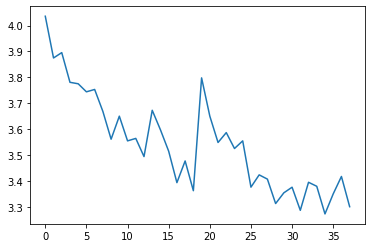

In [ ]:
PATH = './my_model.pth'
torch.save(net.state_dict(), PATH)

plt.plot(loss_vals)

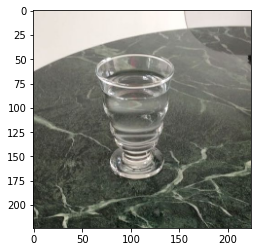

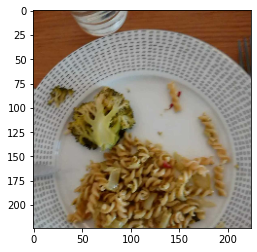

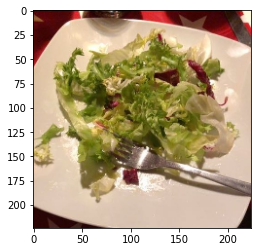

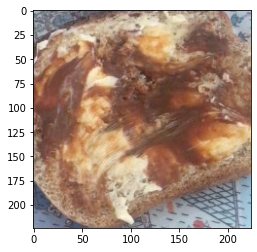

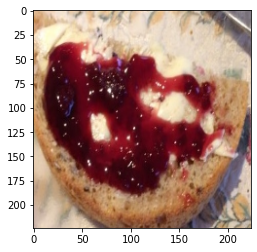

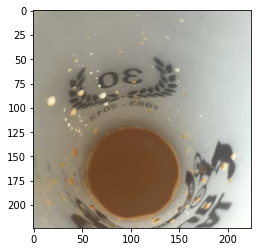

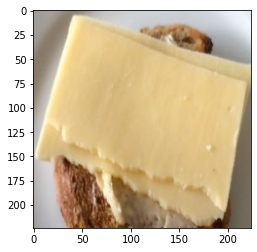

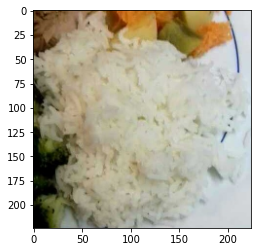

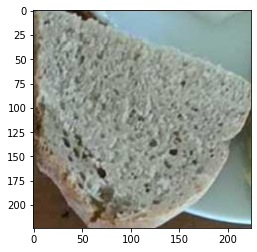

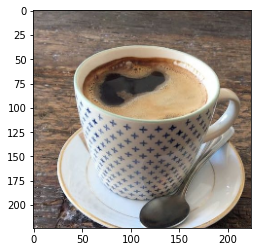

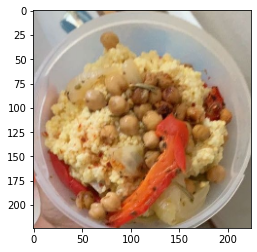

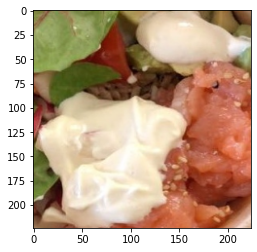

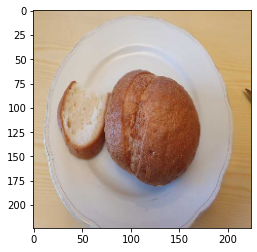

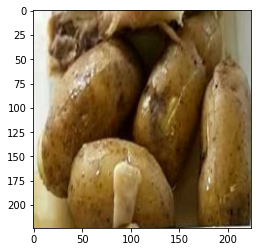

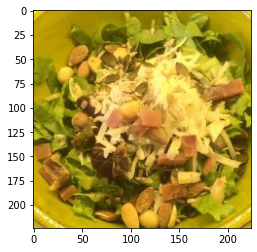

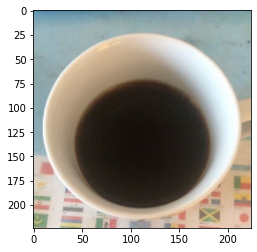

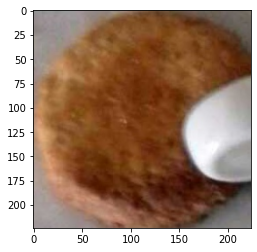

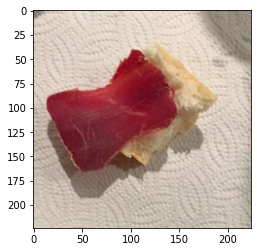

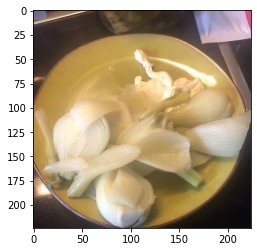

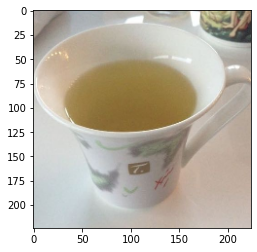

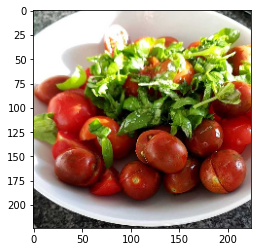

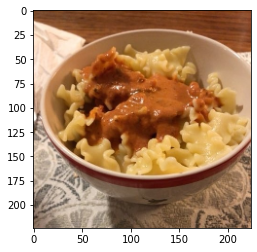

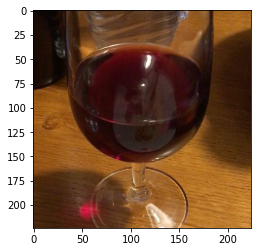

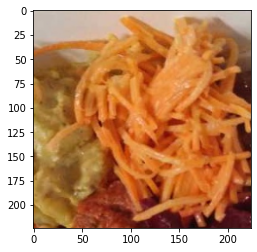

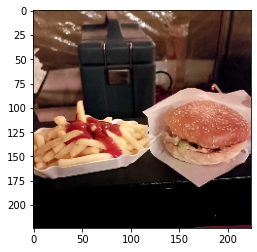

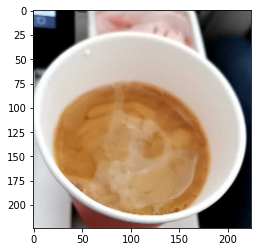

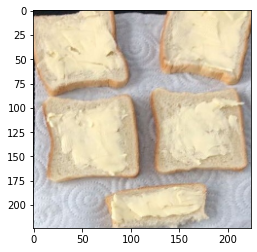

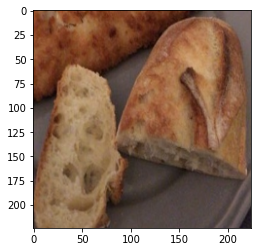

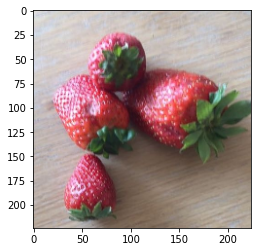

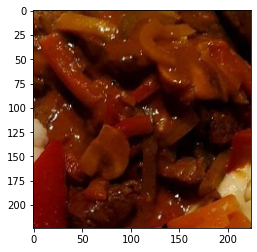

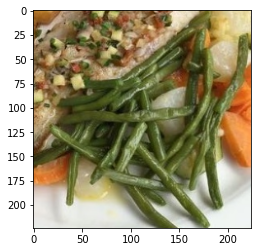

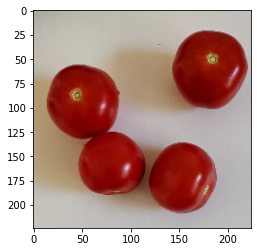

torch.Size([32, 3, 224, 224])

In [ ]:
dataiter = iter(test_dataloader)
images = dataiter.next()
for i in images:
    plt.imshow(np.transpose(i, (1, 2, 0)))
    plt.show()
images = images.float()
images.size()

# imshow(torchvision.utils.make_grid(features))


In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)
print(outputs.size())

torch.Size([32, 62])


Predicting the output of the neural network for the test images. 

In [ ]:
_, predicted = torch.max(outputs, 1)

print(labels_map[predicted])

['chips-french-fries' 'salad-leaf-salad-green' 'bread-white'
 'salad-leaf-salad-green' 'bread-white' 'coffee-with-caffeine'
 'salad-leaf-salad-green' 'water' 'coffee-with-caffeine' 'water'
 'coffee-with-caffeine' 'salad-leaf-salad-green' 'bread-white'
 'salad-leaf-salad-green' 'water' 'bread-white' 'water' 'bread-white'
 'bread-wholemeal' 'coffee-with-caffeine' 'bread-white' 'tomato' 'tomato'
 'mandarine' 'bread-white' 'bread-white' 'bread-white' 'tomato'
 'bread-white' 'tomato' 'bread-white' 'salad-leaf-salad-green']
